In [1]:
import pandas as pd
import csv
import os
print(os.getcwd())
all_data = []
with open('sum-interpret/output_fast.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',',)
    for row in spamreader:
        if row[-3] == '0':
            continue
        all_data.append(row)
import numpy as np


/home/jcxu


In [2]:
key = all_data[0]
data = all_data[1:]
import statistics
import random
print(key)
print(data[0])
print(len(data))

import seaborn as sns

import matplotlib.colors as mcolors

colors =[ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colors = mcolors.TABLEAU_COLORS


3', '0.696097151376307', '[0.007902410812675953, 0.011749180033802986, 0.0, 0.0, 0.0, 0.09306756407022476, 0.7971991896629333, 0.0, 0.0]', '["Opposition lawmakers tried to block discussions on the introduction of manual vote-counting for next year\'s presidential election.", \'The government wants a back-up to the electronic system but the opposition says it is a way of rigging the poll.\', \'Kenyan politics is known to be highly partisan and this is not the first physical fight.\', \'In 2014, four lawmakers were assaulted and one had his shirt torn.\', \'Africa Live: BBC news updates\', \'The live video feed from parliament was cut after the fight broke out on Tuesday evening and journalists were ordered out of the press gallery.\', \'After an earlier highly charged discussion over the proposed changes to the electoral law, opposition MP Millie Odhiambo attacked President Uhuru Kenyatta, calling him "extremely stupid".\', \'Mr Kenyatta gave his initial response to that attack at an ev

In [3]:
import logging
from datetime import datetime
now = datetime.now()
logger = logging.getLogger('sum')
logger.setLevel(logging.DEBUG)
# create file handler which logs even debug messages
fh = logging.FileHandler(f"output_{now.strftime('%m')}{now.strftime('%d')}.log")
fh.setLevel(logging.DEBUG)
# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
# create formatter and add it to the handlers
formatter = logging.Formatter('%(levelname)s - %(message)s')
ch.setFormatter(formatter)
fh.setFormatter(formatter)
# add the handlers to logger
logger.addHandler(ch)
logger.addHandler(fh)

In [4]:
dict_pos = {}


def pnum(num):
    return "{:.2f}".format(num)


index_of_pos = key.index('pos')
index_of_prefix=key.index('prefix')
# index_of_full2lm = key.index('full_lm')
# index_of_lm2full = key.index('lm_full')

index_of_lm2imp = key.index('lm_imp')
# index_of_imp2lm = key.index('imp2lm')

index_of_impood2imp = key.index('imp_cnn_imp')


index_of_imp2full = key.index('imp_full')
# index_of_full2imp = key.index('full2imp')


index_of_tok = key.index('tok')
index_of_domain = key.index('domain_rate')
index_of_pert_top = key.index('pert_top')
index_of_pert_var = key.index('pert_var')
index_of_pert_distb = key.index('pert_distb')
index_of_pert_sents=key.index('pert_sents')
# 'top_lm', 'top_imp', 'top_full', 'top_impood', 'top_fullood', 'top_attn'
index_top_lm = key.index('top_lm')
index_top_imp = key.index('top_imp')
index_top_full = key.index('top_full')
index_top_imp_cnn = key.index('top_impood')
# index_top_lm = key.index('top_lm')
index_top_attn = key.index('top_attn')


# xaxis = index_of_lm2imp
xaxis = index_of_impood2imp

x = []
y = []
list_pos = []
domain = []
pert_top = []
pert_var = []
pert_distb = []
pert_sents = []
distb_lm, distb_imp, distb_full, dist_imp_cnn, dist_attn = [],[],[],[],[]
cnt = 0
d_color = {}
for d in data:

    pos = d[index_of_pos]
    # print(d)
    if d[index_of_imp2full] == '' or d[xaxis] == "":
        print('emtpy!')
        continue
    x_value = float(d[xaxis])
    y_value = float(d[index_of_imp2full])
    # if x_value >1.9 and y_value > 1.9:
    #     pass
    # else:
    #     continue
    # if v_lm2imp >1.5 and v_imp2full< 0.5:
        # print(d[-4:])
    # if v_lm2imp>6.1 or v_imp2full>9.7:
        # continue
    logger.info(f"x:{pnum(x_value)}\ty:{pnum(y_value)}\tprefix:{d[index_of_prefix]}\ttoken:{d[index_of_tok]}")
    sents = eval(d[index_of_pert_sents])
    for idx, s in enumerate(sents):
        logger.info(f"{idx}\t{s}")
    logger.info(f"LM: {eval(d[index_top_lm])}")
    logger.info(f"IMP: {eval(d[index_top_imp])}")
    logger.info(f"FULL: {eval(d[index_top_full])}")
    logger.info(f"IMP OOD: {eval(d[index_top_imp_cnn])}")
    _pert_dist = eval(d[index_of_pert_distb])
    _pert_dist = [float(m) for m in _pert_dist]
    logger.info(f"pert_var:{pnum(float(d[index_of_pert_var]))}\tpert:{pnum(statistics.mean(_pert_dist))}")
    logger.info(f"pert:{[pnum(m) for m in _pert_dist]}")

    x.append(x_value)
    y.append(y_value)
    list_pos.append(pos)
    domain.append(float(d[index_of_domain]))
    pert_top.append(float(d[index_of_pert_top]))
    pert_var.append(float(d[index_of_pert_var]))
    pert_distb.append(eval(d[index_of_pert_distb]))
    pert_sents.append(eval(d[index_of_pert_sents]))
    distb_lm.append(eval(d[index_top_lm]))
    distb_imp.append(eval(d[index_top_imp]))
    distb_full.append(eval(d[index_top_full]))
    dist_imp_cnn.append(eval(d[index_top_imp_cnn]))
    dist_attn.append(eval(d[index_top_attn]))

    logger.info('\n')
from statistics import quantiles

def show_quantiles(var):
    # print(f"{var}")
    print([round(q, 1) for q in quantiles(var, n=10)])
show_quantiles(x)
show_quantiles(y)


'0.08', 'Ġrecovered'), ('0.04', 'made'), ('0.03', '"')]
INFO - IMP OOD: [('0.57', 'been'), ('0.33', 'Ġdied'), ('0.04', 'Ġrecovered'), ('0.03', 'since'), ('0.02', 'Ġpassed')]
INFO - pert_var:0.30	pert:0.38
INFO - pert:['0.44', '0.68', '0.00', '0.42']
INFO - 

INFO - x:1.34	y:1.55	prefix:A former senior police officer who was taken to hospital with a bacterial infection has been 	token:discharged
INFO - 0	Stuart Hyde, ex-chief constable of Cumbria Police, was put into a medically-induced coma and treated for the viral infection.
INFO - 1	Mike Pannett, co-director of the 4 Policing consultancy with Mr Hyde, said he was now out of the coma and talking.
INFO - 2	He said his family thanked everyone for the messages of love and support which had helped them all "so much".
INFO - 3	Mr Hyde retired in 2013 after being suspended twice from the force, investigated and cleared.
INFO - LM: [('0.46', 'Ġdischarged'), ('0.38', 'released'), ('0.03', 'Ġadmitted'), ('0.03', 'Ġtaken'), ('0.02', 'charged')

StatisticsError: mean requires at least one data point

In [ ]:
from sklearn.cluster import KMeans
inp_kmeans = [[r,c] for r,c in zip(x,y)]
inp_kmeans = np.asarray(inp_kmeans)
kmeans = KMeans(n_clusters=1, random_state=0).fit(inp_kmeans)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
labels = kmeans.labels_
print(labels)

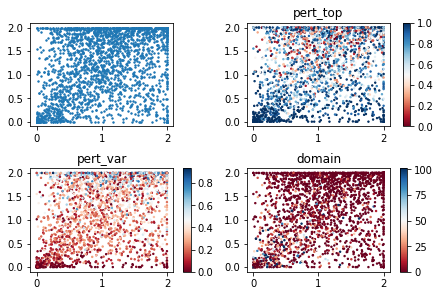

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,2,constrained_layout=True)
# fig, ax = plt.subplots()


# scatter = ax.scatter(x, y,s=1,c=c)
# sns.jointplot(x=x,y=y,hue=domain, kind='scatter',marker="+",marginal_ticks=True)

# target = pert_top
# target = pert_var
target = domain

inp_datas = [None,pert_top,pert_var,domain]
inp_names = ['none','pert_top','pert_var','domain']
# Create a continuous norm to map from data points to colors
# lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
# lc.set_array(dydx)
# lc.set_linewidth(2)
# line = axs[0].add_collection(lc)

# scatter = plt.scatter(x, y,marker='+')

def example_plot(ax_use, inp_data,title):
    if inp_data == None:
        scatter = ax_use.scatter(x, y,s=2)
    else:
        norm = plt.Normalize(min(inp_data), max(inp_data))
        scatter = ax_use.scatter(x, y, c=inp_data,s=2,norm=norm,cmap='RdBu')
        fig.colorbar(scatter, ax=ax_use)
        ax_use.set_title(title)

for idx, ax in enumerate(axs.flat) :
    example_plot(ax,inp_data=inp_datas[idx],title=inp_names[idx])



# plt.legend(loc='upper left')
plt.show()


In [8]:
# project to y
import seaborn as sns

sns.set_theme(style="darkgrid")

nbuckets = 10
data_all = [[] for _ in range(nbuckets)]
data_pv = [[] for _ in range(nbuckets)]
data_dom = [[] for _ in range(nbuckets)]
for cor,pt,pv,dom in zip(y,pert_top,pert_var,domain):
    cor = min(cor,2)
    buc = int(cor // (2/nbuckets))
    # print(cor,buc)
    data_all[buc].append(1)
    data_pv[buc].append(pv)
    data_dom[buc].append(dom)



<ipython-input-9-9dbc8550fc73>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_use.set_xticklabels(range(10))


Text(0.5, 0.98, 'Mean')

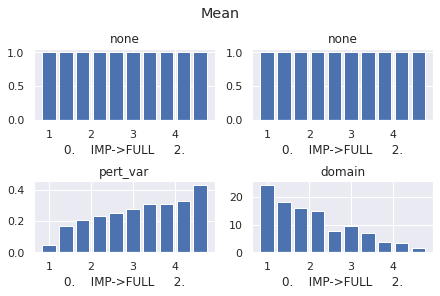

In [9]:
def print_plot(use_data,ax_use,name):
    count =[len(bag) for bag in use_data] 
    mean = [statistics.mean(bag) for bag in use_data]
    ax_use.set_title(name)
    ax_use.set_xticklabels(range(10))
    ax_use.bar(range(nbuckets), mean)

    ax_use.set_xlabel('0.    IMP->FULL     2.')
    # ax_use.lineplot(x=range(nbuckets), y=count,title="Count")
    # plt.title('Scores by group and gender')
targets = [data_all, data_all,data_pv,data_dom ]
inp_names = ['none','none','pert_var','domain']
fig, axs = plt.subplots(2,2,constrained_layout=True)

for idx, ax in enumerate(axs.flat) :
    print_plot(targets[idx],ax,inp_names[idx])
fig.suptitle('Mean')

<ipython-input-10-64cc2fd6f6d6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_use.set_xticklabels(range(10))


Text(0.5, 0.98, 'Count')

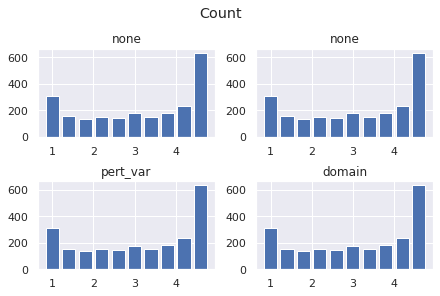

In [10]:
def print_plot(use_data,ax_use,name):
    count =[len(bag) for bag in use_data] 
    mean = [statistics.mean(bag) for bag in use_data]
    ax_use.set_title(name)
    ax_use.set_xticklabels(range(10))
    ax_use.bar(range(nbuckets), count)
    # ax_use.lineplot(x=range(nbuckets), y=count,title="Count")
    # plt.title('Scores by group and gender')
targets = [data_all, data_all,data_pv,data_dom ]
inp_names = ['none','none','pert_var','domain']
fig, axs = plt.subplots(2,2,constrained_layout=True)

for idx, ax in enumerate(axs.flat) :
    print_plot(targets[idx],ax,inp_names[idx])
fig.suptitle('Count')